In [1]:
import pandas as pd 

df = pd.read_csv('earthquake.csv')

# Missing Values

## Visualizing missing values

1. Calculate the count and percentage of missing values in each column and arrange in decreasing order.

In [5]:
#1.1 Find missing values first 
null_mask = df.isnull()

#1.2 Get number of missing values
total_missing_values = null_mask.sum()

#1.3 Convert to percentage
percentage = null_mask.mean() * 100

#1.4 Combine total and percentage into a single DataFrame
missing_data = pd.concat([total_missing_values, percentage], axis=1, join='outer', keys=['count_missing', 'perc_missing'])

#1.5 Sort in descending order
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)

missing_data

,count_missing,perc_missing
state,5764,94.927536
total_damage_millions_dollars,5654,93.115942
damage_millions_dollars,5594,92.127800
injuries,4903,80.747694
total_injuries,4888,80.500659
eq_mag_mw,4856,79.973650
injuries_description,4723,77.783267
total_injuries_description,4715,77.651515
eq_mag_mb,4286,70.586298
second,3351,55.187747


2. Plot the nullity matrix

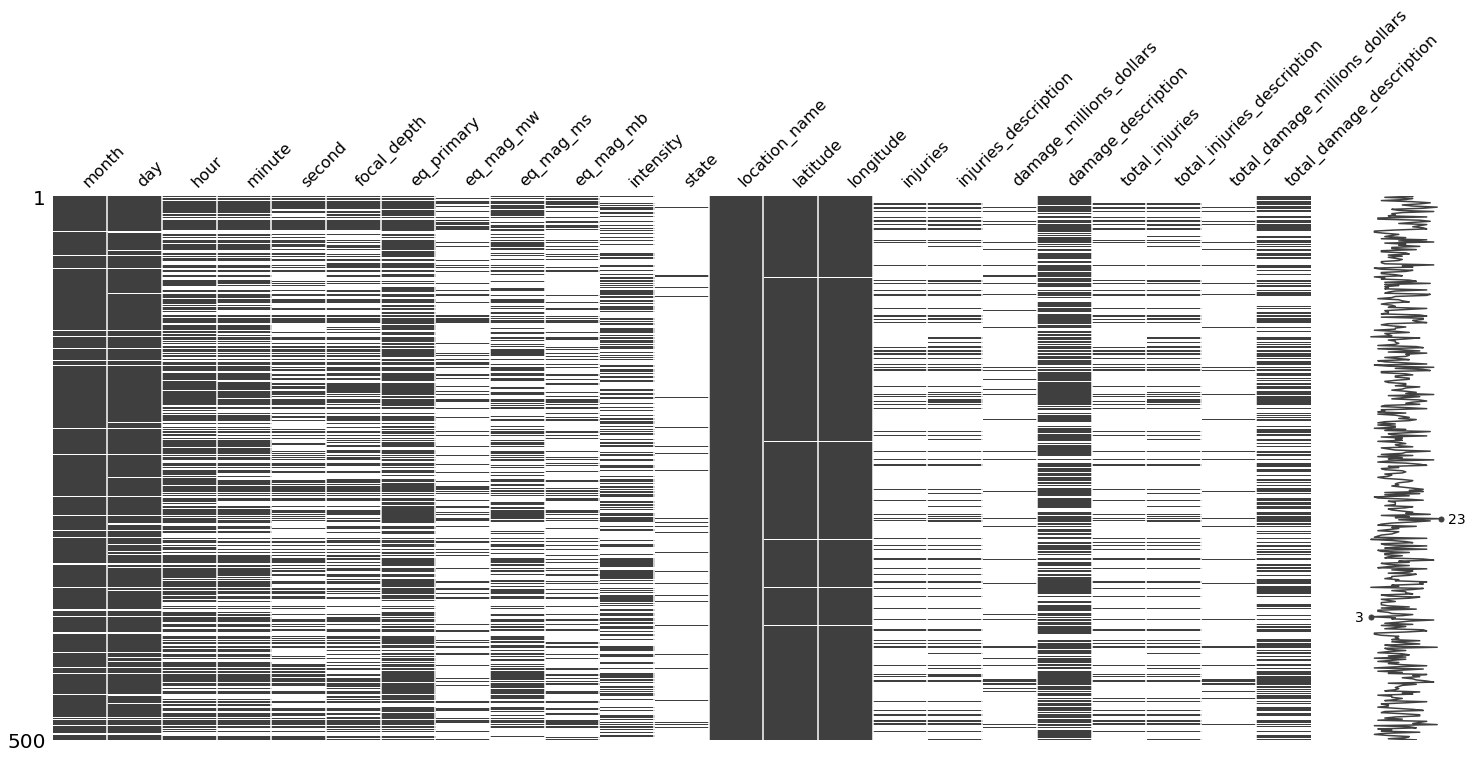

In [6]:
import missingno as msno
import matplotlib.pyplot as pp

#2.1 Find all the columns that has null values
nullable_columns = df.columns[null_mask.any()].tolist()

#2.2 Plot the nullity matrix using a sample of 500 random data points
msno.matrix(df[nullable_columns].sample(500))
pp.show()

Explanation: Black lines represent non-nulls while the white lines indicate the presence of null values in that column.

3. Plot the nullity correlation heatmap.

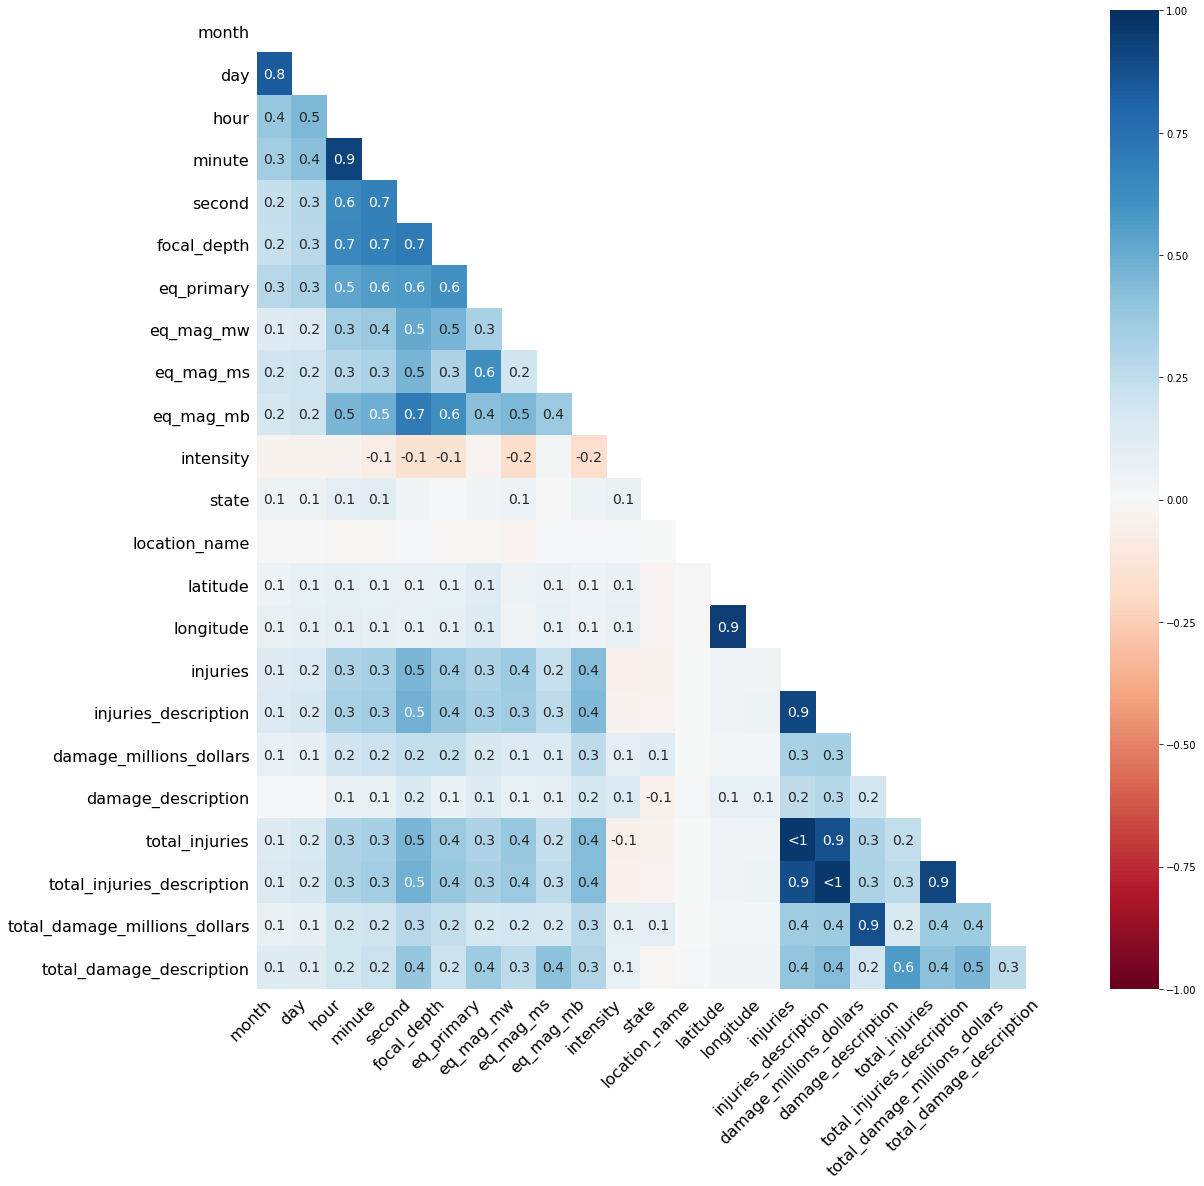

In [7]:
#3.1 Only for those columns that have missing values
msno.heatmap(df[nullable_columns], figsize=(18,18))
pp.show()